In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import konlpy
import koreanize_matplotlib

df = pd.read_csv("Bank-Customer-Attrition-Insights-Data.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


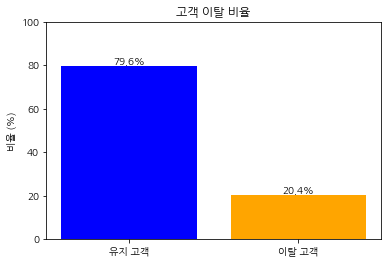

In [3]:
# 이탈 여부 퍼센트 계산

churn_counts = df['Exited'].value_counts()
percent = churn_counts / churn_counts.sum() * 100
labels = ['유지 고객', '이탈 고객']

# 시각화
plt.bar(labels, percent, color=['blue', 'orange'])
plt.title('고객 이탈 비율')
plt.ylabel('비율 (%)')

for i, v in enumerate(percent):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.ylim(0, 100)
plt.show()

In [4]:
gender_churn = df.groupby('Gender')['Exited'].mean() * 100
print(gender_churn)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


In [5]:
geo_churn = df.groupby('Geography')['Exited'].mean() * 100
print(geo_churn)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


In [6]:
card_churn = df.groupby('Card Type')['Exited'].mean().sort_values(ascending=False) * 100
print(card_churn)

Card Type
DIAMOND     21.779019
PLATINUM    20.360721
SILVER      20.112179
GOLD        19.264588
Name: Exited, dtype: float64


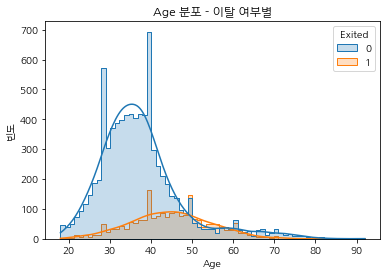

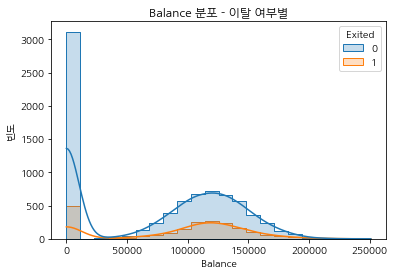

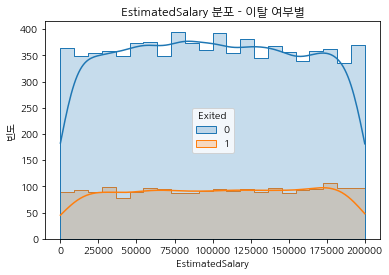

In [7]:
# 나이, 잔액, 추정 월급
numeric_cols = ['Age', 'Balance', 'EstimatedSalary']

for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df, x=col, hue='Exited', kde=True, element='step')
    plt.title(f'{col} 분포 - 이탈 여부별')
    plt.xlabel(col)
    plt.ylabel('빈도')
    plt.show()

In [8]:
# 숫자형 컬럼만 추출
numeric_df = df.select_dtypes(include='number')

# 상관계수 계산
correlation = numeric_df.corr()

# 이탈(Exited)과의 상관계수만 보기
correlation['Exited'].sort_values(ascending=False)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Balance               0.118577
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
HasCrCard            -0.006976
Tenure               -0.013656
CustomerId           -0.014990
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
IsActiveMember       -0.156356
Name: Exited, dtype: float64

In [9]:
summary = pd.DataFrame({
    '전체 평균': df.mean(numeric_only=True),
    '이탈자 평균': df[df['Exited'] == 1].mean(numeric_only=True),
    '유지 고객 평균': df[df['Exited'] == 0].mean(numeric_only=True)
})
print(summary)

                           전체 평균        이탈자 평균      유지 고객 평균
RowNumber           5.000500e+03  4.908407e+03  5.024073e+03
CustomerId          1.569094e+07  1.568881e+07  1.569149e+07
CreditScore         6.505288e+02  6.454146e+02  6.518379e+02
Age                 3.892180e+01  4.483562e+01  3.740806e+01
Tenure              5.012800e+00  4.934740e+00  5.032781e+00
Balance             7.648589e+04  9.110948e+04  7.274275e+04
NumOfProducts       1.530200e+00  1.475466e+00  1.544210e+00
HasCrCard           7.055000e-01  6.992149e-01  7.071088e-01
IsActiveMember      5.151000e-01  3.606477e-01  5.546345e-01
EstimatedSalary     1.000902e+05  1.015099e+05  9.972685e+04
Exited              2.038000e-01  1.000000e+00  0.000000e+00
Complain            2.044000e-01  9.980373e-01  1.255966e-03
Satisfaction Score  3.013800e+00  2.997547e+00  3.017960e+00
Point Earned        6.065151e+02  6.044485e+02  6.070441e+02


Satisfaction Score
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
Name: Exited, dtype: float64


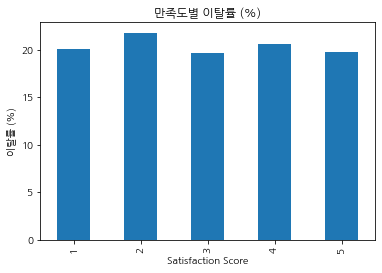

In [10]:
satis = df.groupby('Satisfaction Score')['Exited'].mean() * 100
print(satis)
satis.plot(kind='bar', title='만족도별 이탈률 (%)')
plt.ylabel('이탈률 (%)')
plt.show()

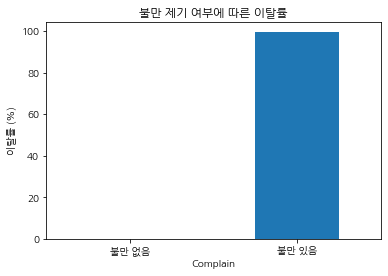

In [11]:
complain = df.groupby('Complain')['Exited'].mean() * 100
complain.plot(kind='bar', title='불만 제기 여부에 따른 이탈률')
plt.xticks([0,1], ['불만 없음', '불만 있음'], rotation=0)
plt.ylabel('이탈률 (%)')
plt.show()